# Q.1.
What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

Inductive Reasoning is a form of propositional logic. It is a logical process, wherein numerous premises are combined to get a specific result. Also known as cause-effect and bottom-up reasoning, inductive reasoning uses limited sets of data and facts to reach a conclusion, through the process of generalization. In short, it initiates the process of reasoning with a series of specific data and then arrives at a general conclusion. It is distinguished from deductive reasoning insofar as the truth or falsity of the uncertain proposition is not logically determined by what is known. Deductive Reasoning is the strategic approach that uses available facts, information or knowledge to draw valid conclusions. It basically beliefs in the facts and ideas before drawing any result. Deductive reasoning uses a top-down approach. In deductive reasoning, the arguments can be valid or invalid based on the value of the premises. If the value of the premises is true, then the conclusion is also true.

Inductive Reasoning: I always get allergies in the summer, I must be allergic to summer.
Deductive Reasoning: If all spiders have eight legs, and tarantulas are spiders, they must have eight legs.

# Q. 2.
Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t.  

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import ols, logit
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, IsolationForest
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from statsmodels.graphics.mosaicplot import mosaic

In [4]:
#create and examine dataframe, add headings to make sure the data is easy to understand from attribute information column
abalone_df = pd.read_csv("../dataset/abalone.data",  header=None, names=['Sex',
                                                            'Length',
                                                            'Diameter',
                                                            'Height',
                                                            'Whole weight',
                                                            'Shucked weight',
                                                            'Viscera weight',
                                                            'Shell weight',
                                                            'Rings',])
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
#find number of NaNs in data
print(abalone_df.isnull().sum().sort_values())
#find data types
print(abalone_df.dtypes)
#find data variance
print(abalone_df.var(numeric_only=True))

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object
Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64


In [8]:
# Sex is a non numerical categorical data with 3 values
# using get dummies to convert categorical data
abalone_df = pd.get_dummies(abalone_df,prefix=["Sex"], columns = ["Sex"], drop_first=True)

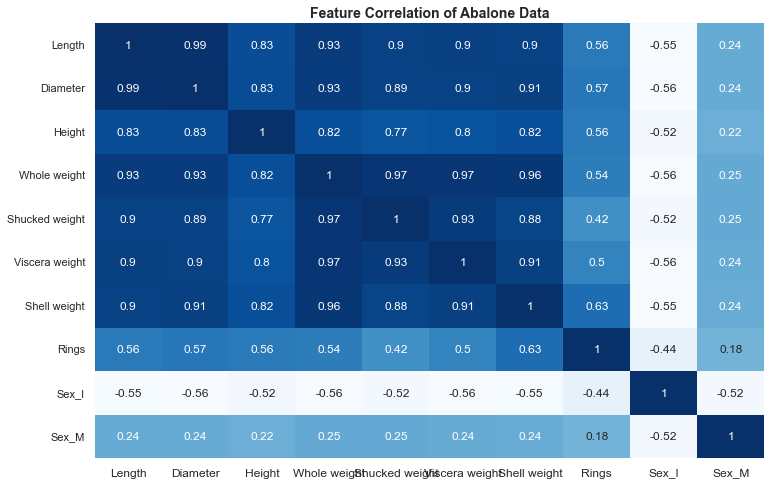

In [11]:
# plotting the heatmap
correlation = abalone_df.corr()
g = sns.heatmap(correlation, annot=True, linewidth=0, cmap="Blues",cbar=False)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 12)
g.set_title('Feature Correlation of Abalone Data',size=14, weight='bold')
sns.set(rc={'figure.figsize':(14,14)})

In [22]:
X = abalone_df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
y = abalone_df['Rings']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=24)

# Examine shape of the training dataset:
print(X_train.shape, y_train.shape)


(2923, 7) (2923,)


In [27]:
rf = RandomForestRegressor()
rf.fit(X,y)

# Baseline performance:
y_pred = rf.predict(X_test)

# Report:
mse = mean_squared_error(y_test, y_pred)
rms = mse**(1/2)

print("MSE = "+str(mse))
print("RMSE = "+str(rms))


MSE = 0.6976276714513556
RMSE = 0.8352410858257366


The model is not as close to the values as we were hoping for, this could be due to strong multicollinearity between the parameters. For this reason, we also dont need to do feature selection. 

# Q. 3.
Create a decision tree model tuned to the best of your abilities. Explain how you tuned it. 

In [28]:
# Instantiate the classifier and fit it to my dataset:
tree = DecisionTreeRegressor(random_state=24)

# Create the model and get predicted values:
tree = tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Report:
mset = mean_squared_error(y_test, y_pred)
rmst = mset**(1/2)

print("MSE = "+str(mset))
print("RMSE = "+str(rmst))

MSE = 8.817384370015949
RMSE = 2.96940808411642


In [29]:
# GridSearch Cross Validation to tune few hyperparameters on mean squared error scoring to get the best score
param_grid = {'max_features': [2, 4, 6, 7], 'min_samples_leaf':[0.12, 0.18, 0.2, 0.26]}

dt = DecisionTreeRegressor(criterion="squared_error", random_state = 24)

grid = GridSearchCV(dt, param_grid, cv=5, scoring="neg_mean_squared_error")

grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_features': [2, 4, 6, 7],
                         'min_samples_leaf': [0.12, 0.18, 0.2, 0.26]},
             scoring='neg_mean_squared_error')

In [30]:
print("Best RMSE score is ",np.sqrt(-grid.best_score_))
grid.best_estimator_

Best RMSE score is  2.565075495067599


DecisionTreeRegressor(max_features=6, min_samples_leaf=0.12, random_state=24)

# Q. 4.
Create a random forest model tuned to the best of your abilities. Explain how you tuned it

In [31]:
param_grid = {'n_estimators': [100, 300, 500], 'max_features': [2, 4, 6, 7], 'bootstrap': [True,False]}

forest = RandomForestRegressor(random_state=24)
gridF = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error")
gridF.fit(X_train, y_train)

#this model ran very slow and took some time to give answers

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=24),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 7],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error')

In [32]:
print("Best RMSE score is ",np.sqrt(-gridF.best_score_))
gridF.best_params_

Best RMSE score is  2.165444537289049


{'bootstrap': True, 'max_features': 2, 'n_estimators': 300}

# Q. 5.
Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.  

In [33]:
xgbr = XGBRegressor(random_state=24)

param_grid = {'objective':['reg:squarederror'], 'booster':['gbtree'],
              'learning_rate': [.03, 0.05, .07], 'n_estimators': [100,300,500],
             'colsample_bytree':[0.8], 'max_depth':[6,8,10,12]}

gridX = GridSearchCV(xgbr, param_grid, cv=5, scoring="neg_mean_squared_error")
gridX.fit(X_train, y_train)
#this took half as much time as previous model, so definitely better timewise

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=24, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    valid

In [34]:
print("Best RMSE score is ",np.sqrt(-gridX.best_score_))
gridX.best_params_

Best RMSE score is  2.188869893006753


{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100,
 'objective': 'reg:squarederror'}

# Q. 6
Which model performed best? What is your performance metric? Why?  

In [35]:
final_model = gridX.best_estimator_
y_pred = final_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
rmse

2.2085635395281376

Of all the models XGBoost performed the best. This is probably because gradient boosting feature helped us get the best possible model.

The performance metric used here is Root Mean Squared Error. This was used as the Abalone data set's target variable is continuous data and not a categorical one. Hence it makes more sense to take RMSE, which is the difference between the actual and the predicted data, as a metric to evaluate the model.
